In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy.stats import multivariate_normal

In [3]:
# Helper function: sigmoid
def sigmoid(x, amp=20, ceiling=1):
    return ceiling / (1 + np.exp(-amp * x))

# Derivative function
def derivative(f, x, h=1e-5):
    return (f(x + h) - f(x)) / h

# Second derivative function
def second_derivative(f, x, h=1e-5):
    return (f(x + 2*h) - 2*f(x + h) + f(x)) / h**2

def pos_derivative(x, xh, h):
    return (xh - x) / h

# Simulated annealing schedule
def simulated_annealing_schedule(i, periodicity=100, amplitude=1):
    return amplitude * (i % periodicity == 0)

# Reward function
def reward(x, dt=0.1, y=None, scale=1):
    if y:
        mu1 = np.array([0, 1]) 
        cov1 = np.array([[2, 0], [0, 2]])
 
        mu2 = np.array([-2, -2])
        cov2 = np.array([[1, 0], [0,2]]) 

        mu3 = np.array([4, -4]) 
        cov3 = np.array([[3, 0], [0, 2]])  
        
        mu4 = np.array([4, 1.5]) 
        cov4 = np.array([[8, 0], [0, 1]])  
        
        mu5 = np.array([-1, 0]) 
        cov5 = np.array([[1, 0], [0, 2]])  
        
        # Base "curvy" surface
        base_reward = np.sin(scale * np.sqrt(x**2 + y**2))  
        
        return  scale * (multivariate_normal.pdf([x, y], mean=mu1, cov=cov1) + \
                multivariate_normal.pdf([x, y], mean=mu2, cov=cov2) + \
                multivariate_normal.pdf([x,y], mean=mu4, cov=cov4) +
                multivariate_normal.pdf([x, y], mean=mu3, cov=cov3) -
                multivariate_normal.pdf([x, y], mean=mu5, cov=cov5))
    else:
        if x < 10:
            return 3*np.sin(5*x) + x # Updated the function as per your request
        else:
            return -x

<IPython.core.display.Javascript object>


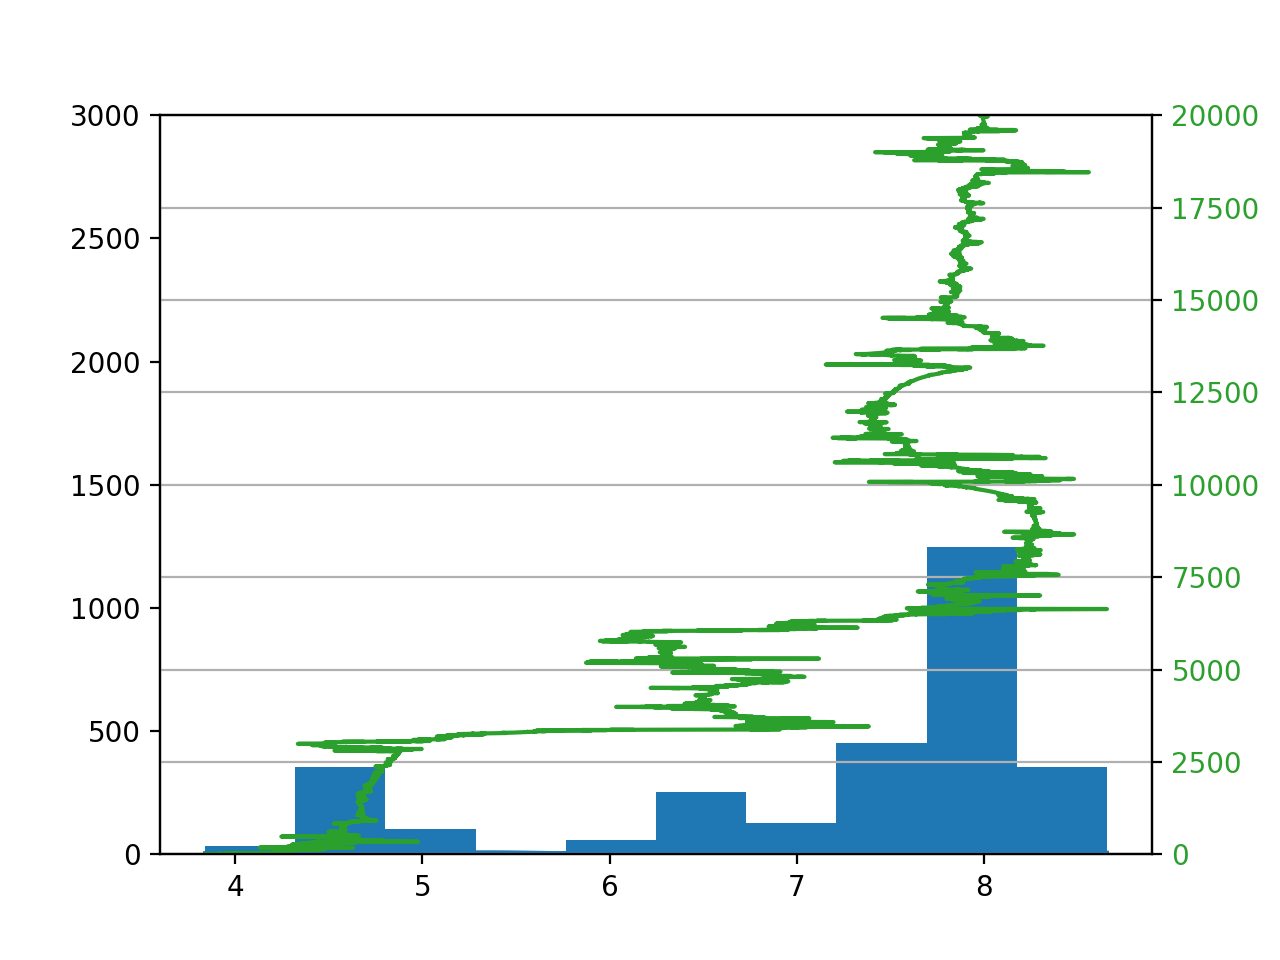

<IPython.core.display.Javascript object>


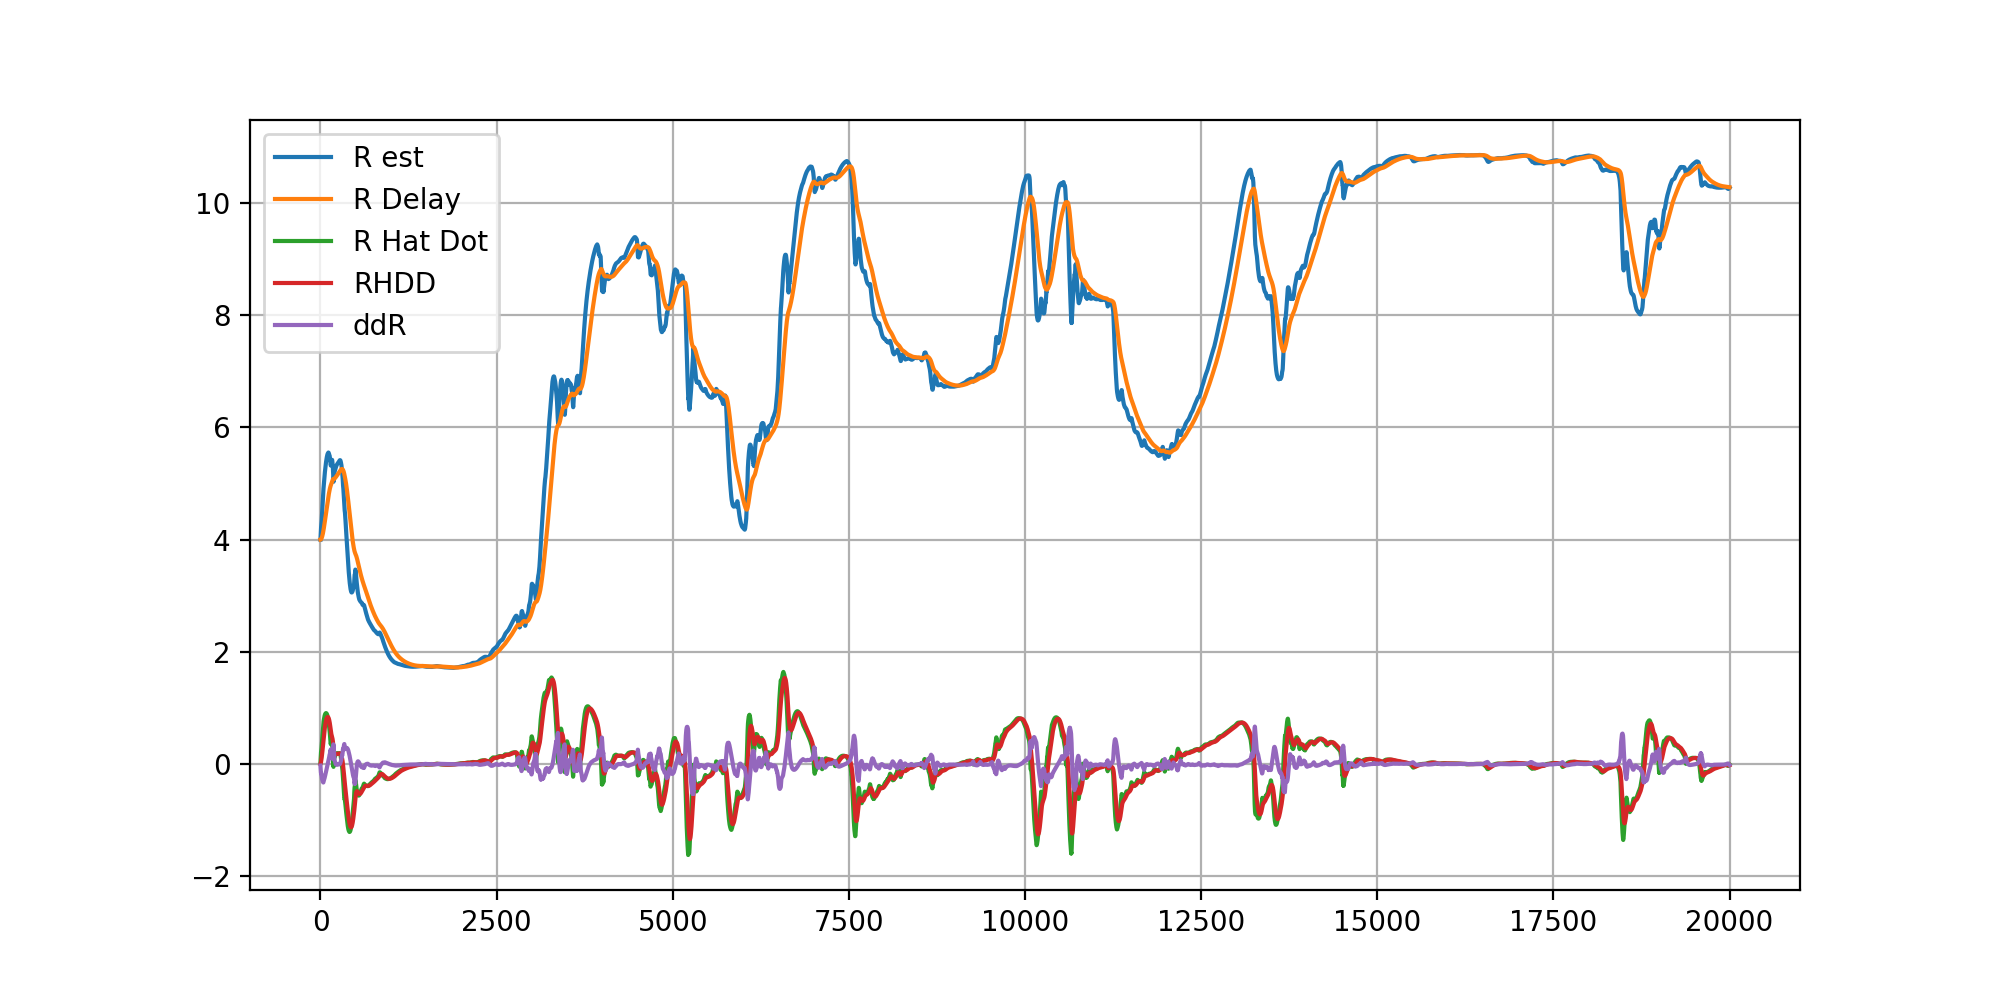

In [4]:
# Initial state
x = 4

# Noise parameters
c = 0.1
# np.random.seed(0)  # For reproducibility

dt = 0.1

reward_vals = [reward(x)]
R_est = R_delay = 4
R_est_vals = [R_est]
R_delay_vals = [R_delay]

dRdT_vals = [0, 0]
dR_vals = [0]

X_est = X_delay = x

X_est_vals = []
X_delay_vals = []

R_hat_dot_delay = 0
dR_hat_dot_delay = 0
R_hat_dot_delay_vals=[]
X_hat_dot_vals = []
R_hat_dot_vals = []
ddR_vals = []

# Create a list to store the path
path = [x]
tau = 10
num_steps = 20000
# Hill climbing iterations
for i in range(num_steps):
    # Store the current state in the path
    path.append(x)

    # Calculate the derivatives
    # dw = pos_derivative(path[-2], path[-1], dt)
    
    # dR = derivative(reward, x)
    # TODO: fix reward rate 
    R = reward(x)
    # r = (R - reward_vals[-1])/dt
    reward_vals.append(R)
    
    dX_est = (1/tau) * (x - X_est)
    dX_delay = (1/tau) * (X_est - X_delay)
    
    X_est += (dX_est*dt)
    X_delay += (dX_delay*dt)
    
    X_est_vals.append(X_est)
    X_delay_vals.append(X_delay)
    
    X_hat_dot = X_est-X_delay
    X_hat_dot_vals.append(X_hat_dot)

    # dX = (1/tau) * (-x + (X_est - X_delay)) # or dX = X_est - X_delay
    
    dR_est = (1/tau) * (R - R_est)
    dR_delay = (1/tau) * (R_est - R_delay)
    
    R_est += (dR_est*dt)
    R_delay += (dR_delay*dt)
    
    R_est_vals.append(R_est)
    R_delay_vals.append(R_delay)
    
    R_hat_dot = R_est - R_delay
    R_hat_dot_vals.append(R_hat_dot)
    
    # second derivative
    dR_hat_dot_delay = (1/(.25*tau)) * (R_hat_dot - R_hat_dot_delay)
    R_hat_dot_delay += dR_hat_dot_delay*dt
    
    R_hat_dot_delay_vals.append(R_hat_dot_delay)
    
    ddR = R_hat_dot_delay - R_hat_dot
    ddR_vals.append(ddR)
    # X_double_dot = ((1/tau) * 
    # dRdT = (1/tau) * (R-r) # X_est = 1/tau * (x - X_est)
    
    
    # dRdT_vals.append(dRdT)
    # dR_vals.append(dR)
    
    # d2R = second_derivative(reward, x)
    # d2R = pos_derivative(dR_vals[-2],dR_vals[-1],dt)
    
    # Update the position (hill climbing step)
    # dx = np.sign(dR)
    
    # Add the noise term
    # reward_sigmoid = sigmoid(d2R)
    
    # noise = reward_sigmoid * np.random.normal()
    # if i % 100 == 0:
    #     print(noise)
    ceiling = 0.1
    dXdt = sigmoid(X_hat_dot * R_hat_dot, amp=10, ceiling=ceiling) - (.5 * ceiling) # ((dw * dR) * dt) + c * noise # (c * np.random.normal(0, dt)) + noise 
    # (X_hat_dot * R_hat_dot) + c*np.random.normal(0,np.sqrt(dt))
    
    # Add the simulated annealing term
    # dx += simulated_annealing_schedule(i, periodicity=100, amplitude=0.1)

    # Update the position
    c = 0.01 + (1-abs(R_hat_dot))*ddR # 1/X_hat_dot
    
    x += (dXdt * dt) + c*np.random.normal(0,np.sqrt(dt))

# Create a range of x values
x_values = np.linspace(min(path), max(path), num_steps)

# Create a corresponding list of reward values
reward_values = [reward(x) for x in x_values]
fig, ax1 = plt.subplots()
y_lim = 10
# Plot the reward function
# plt.figure(figsize=(y_lim, 5))
ax1.plot(x_values, reward_values)

ax2 = ax1.twinx()
time = np.linspace(0,num_steps,len(path))
ax2.plot(path, time, color='tab:green')
plt.grid(True)
ax2.set_ylim(0,num_steps)
ax2.tick_params(axis ='y', labelcolor = 'tab:green')
ax2.hist(path)
plt.show()

# Plot the path of the iteration
plt.figure(figsize=(10, 5))
plt.plot(R_est_vals, label='R est')
plt.plot(R_delay_vals, label="R Delay")
plt.plot(R_hat_dot_vals, label="R Hat Dot")
plt.plot(R_hat_dot_delay_vals, label='RHDD')
plt.plot(ddR_vals, label="ddR")

# plt.plot(X_hat_dot_vals, label="X Hat Dot")
# plt.plot(X_delay_vals, label="x_delay")
# plt.plot(path, label="x")
plt.grid()
plt.legend()
# plt.plot(path, range(len(path)))
# plt.title('Path of the Iteration Over Time')
# plt.xlabel('x')
# plt.ylabel('Iteration')
# plt.grid(True)
# plt.gca().invert_yaxis()  # Invert y-axis so that time moves upwards
# plt.show()

In [5]:
ax1.set_ylim([0,3000])

(0.0, 3000.0)

In [6]:
# Form a histogram of x's positions over multiple runs, superimposed over each other 
# Try to implement it in 2 dimensions. An X actor optimizes over x, a y actor optimizes over y, each has their own parameters

In [7]:
# apply method to sin wave, see that derivative is cos and second derivative is negative sin. See how time constant needs to change and how eto use that to leave valleys
# Adaptive noise
# dR/dt is near 0, but d2R/dt2 > 0, then youre at minimum, so boost noise
# if dR/dt ~ 0
# c = c+d2R/dt2

<IPython.core.display.Javascript object>


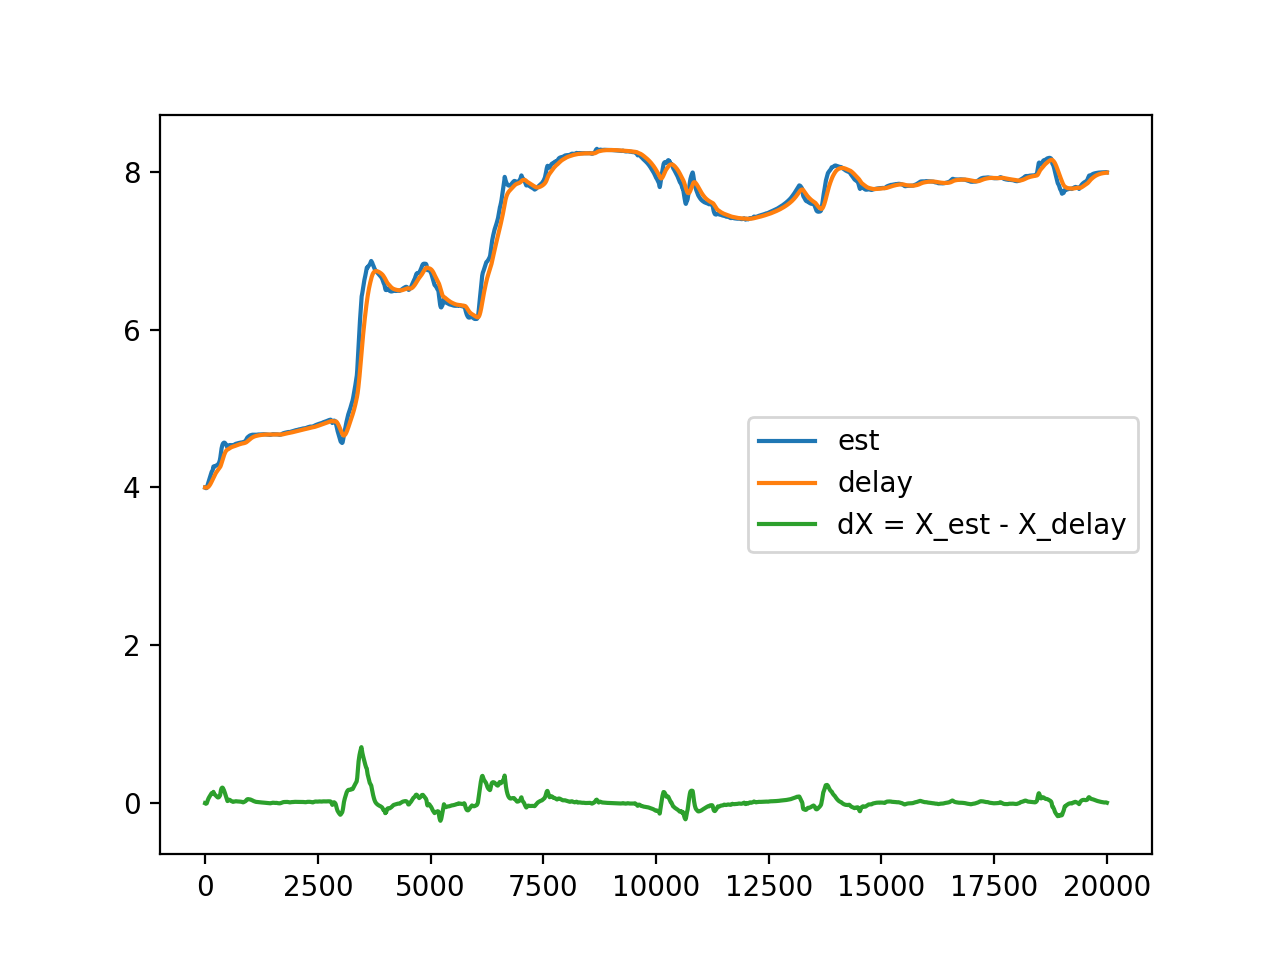

In [8]:
plt.figure()
plt.plot(X_est_vals, label='est')
plt.plot(X_delay_vals, label='delay')
plt.plot(np.array(X_est_vals) - np.array(X_delay_vals), label='dX = X_est - X_delay')
plt.legend()

<IPython.core.display.Javascript object>


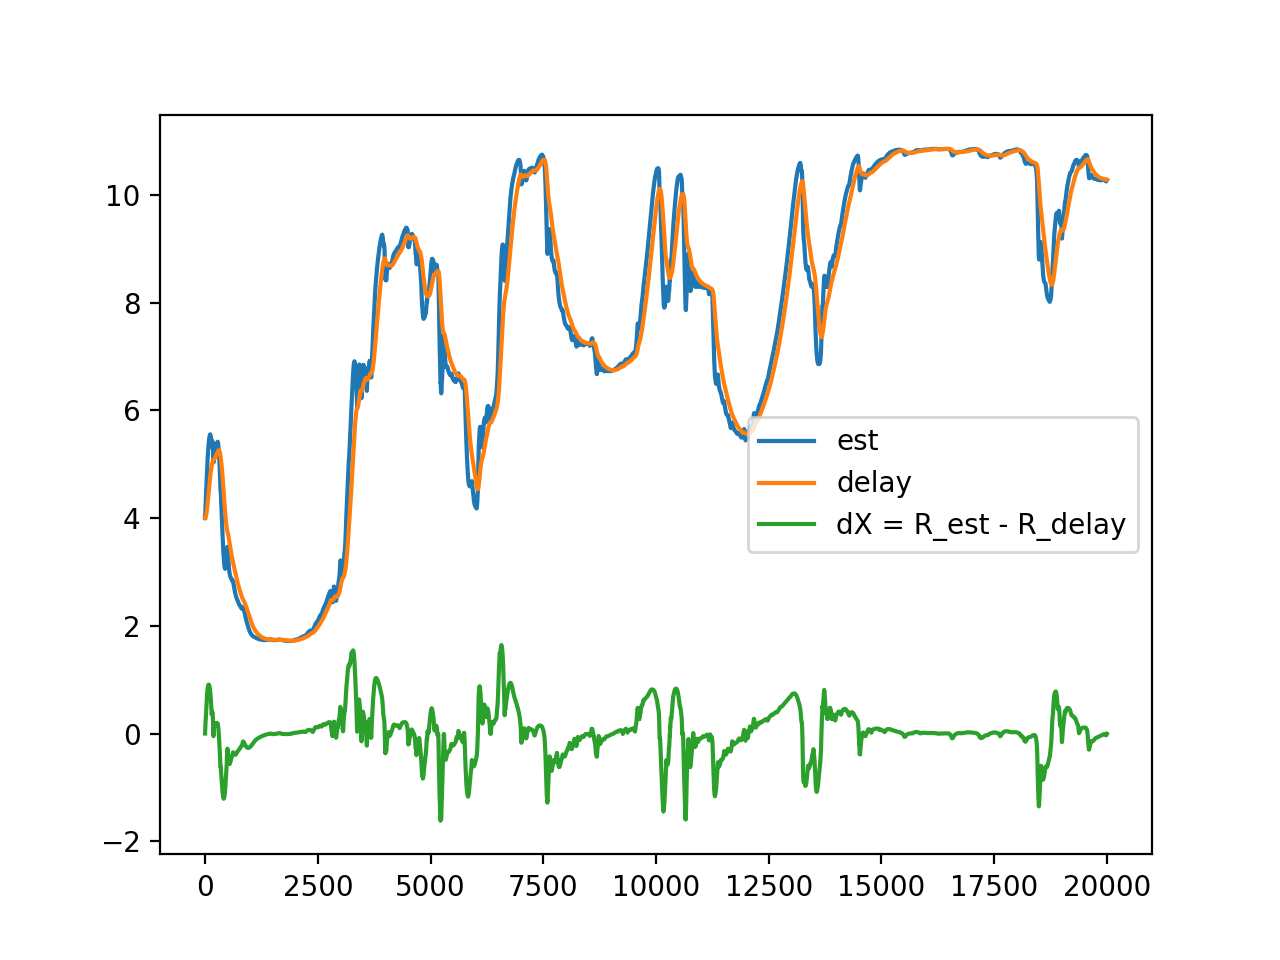

In [9]:
plt.figure()
plt.plot(R_est_vals, label='est')
plt.plot(R_delay_vals, label='delay')
plt.plot(np.array(R_est_vals) - np.array(R_delay_vals), label='dX = R_est - R_delay')
plt.legend()

# 2D Version

<IPython.core.display.Javascript object>


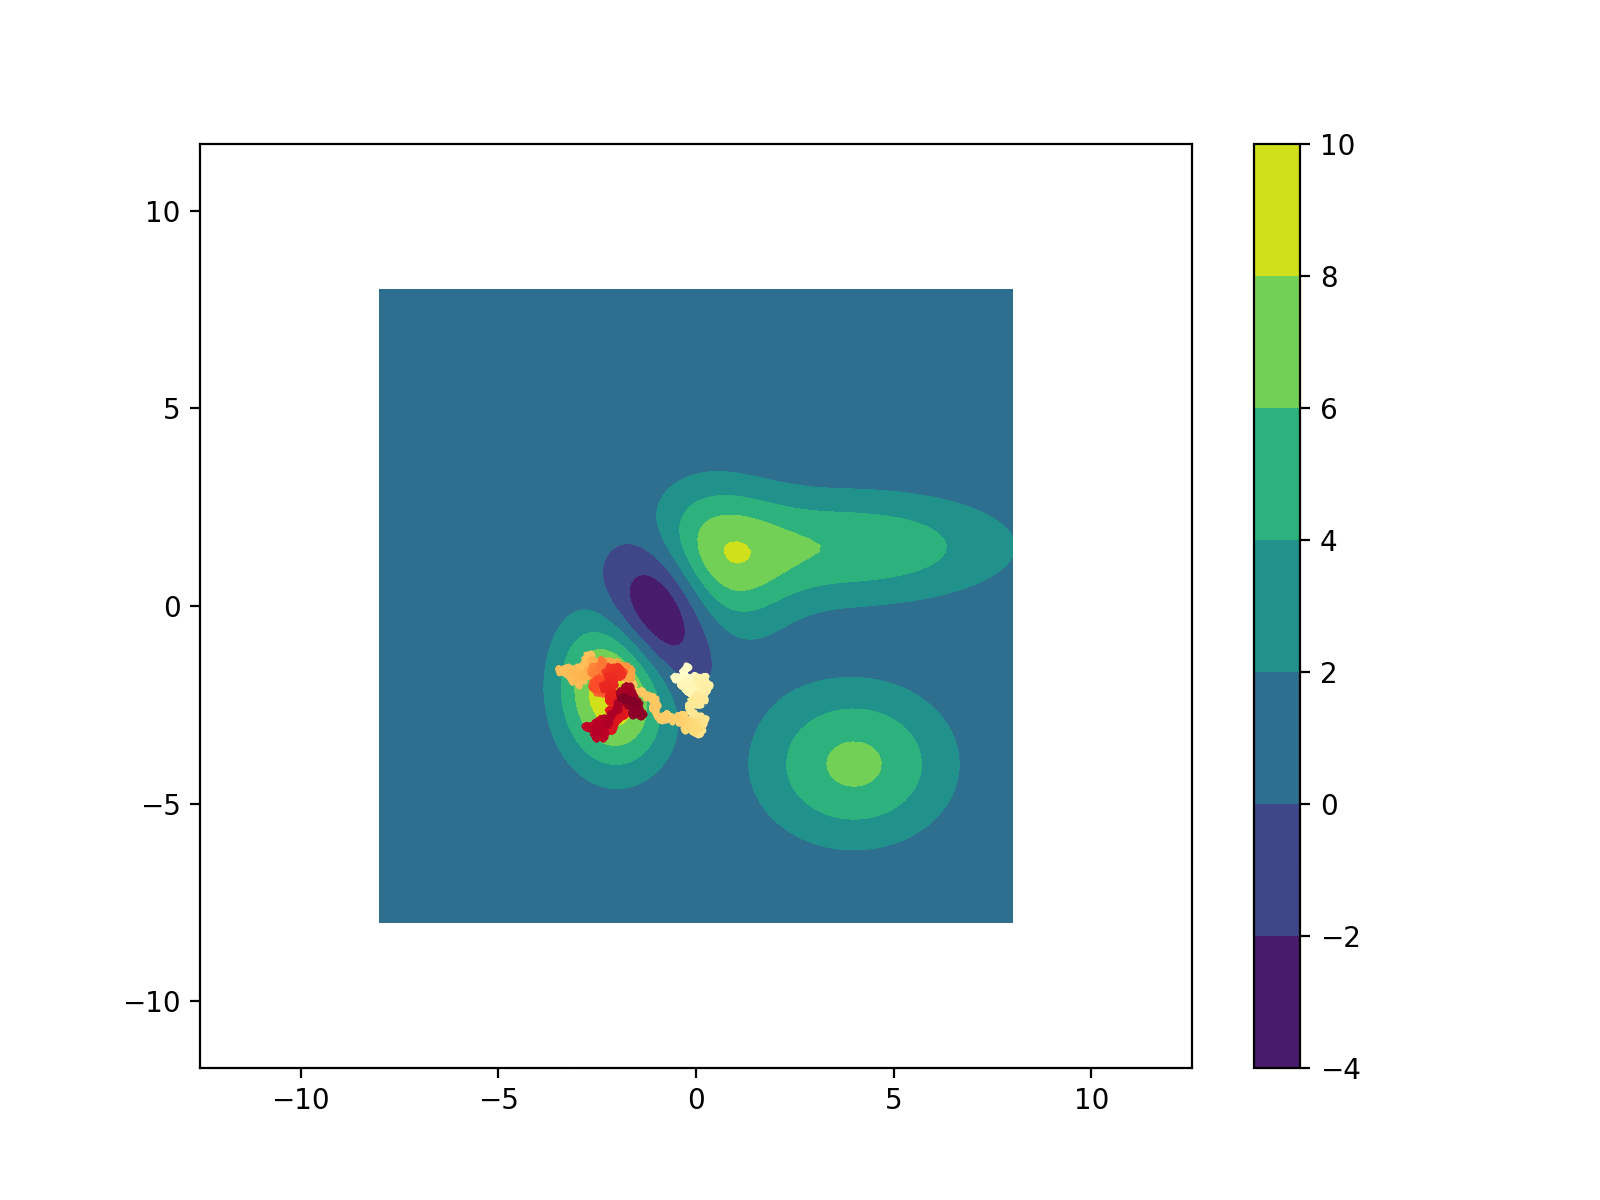

<IPython.core.display.Javascript object>


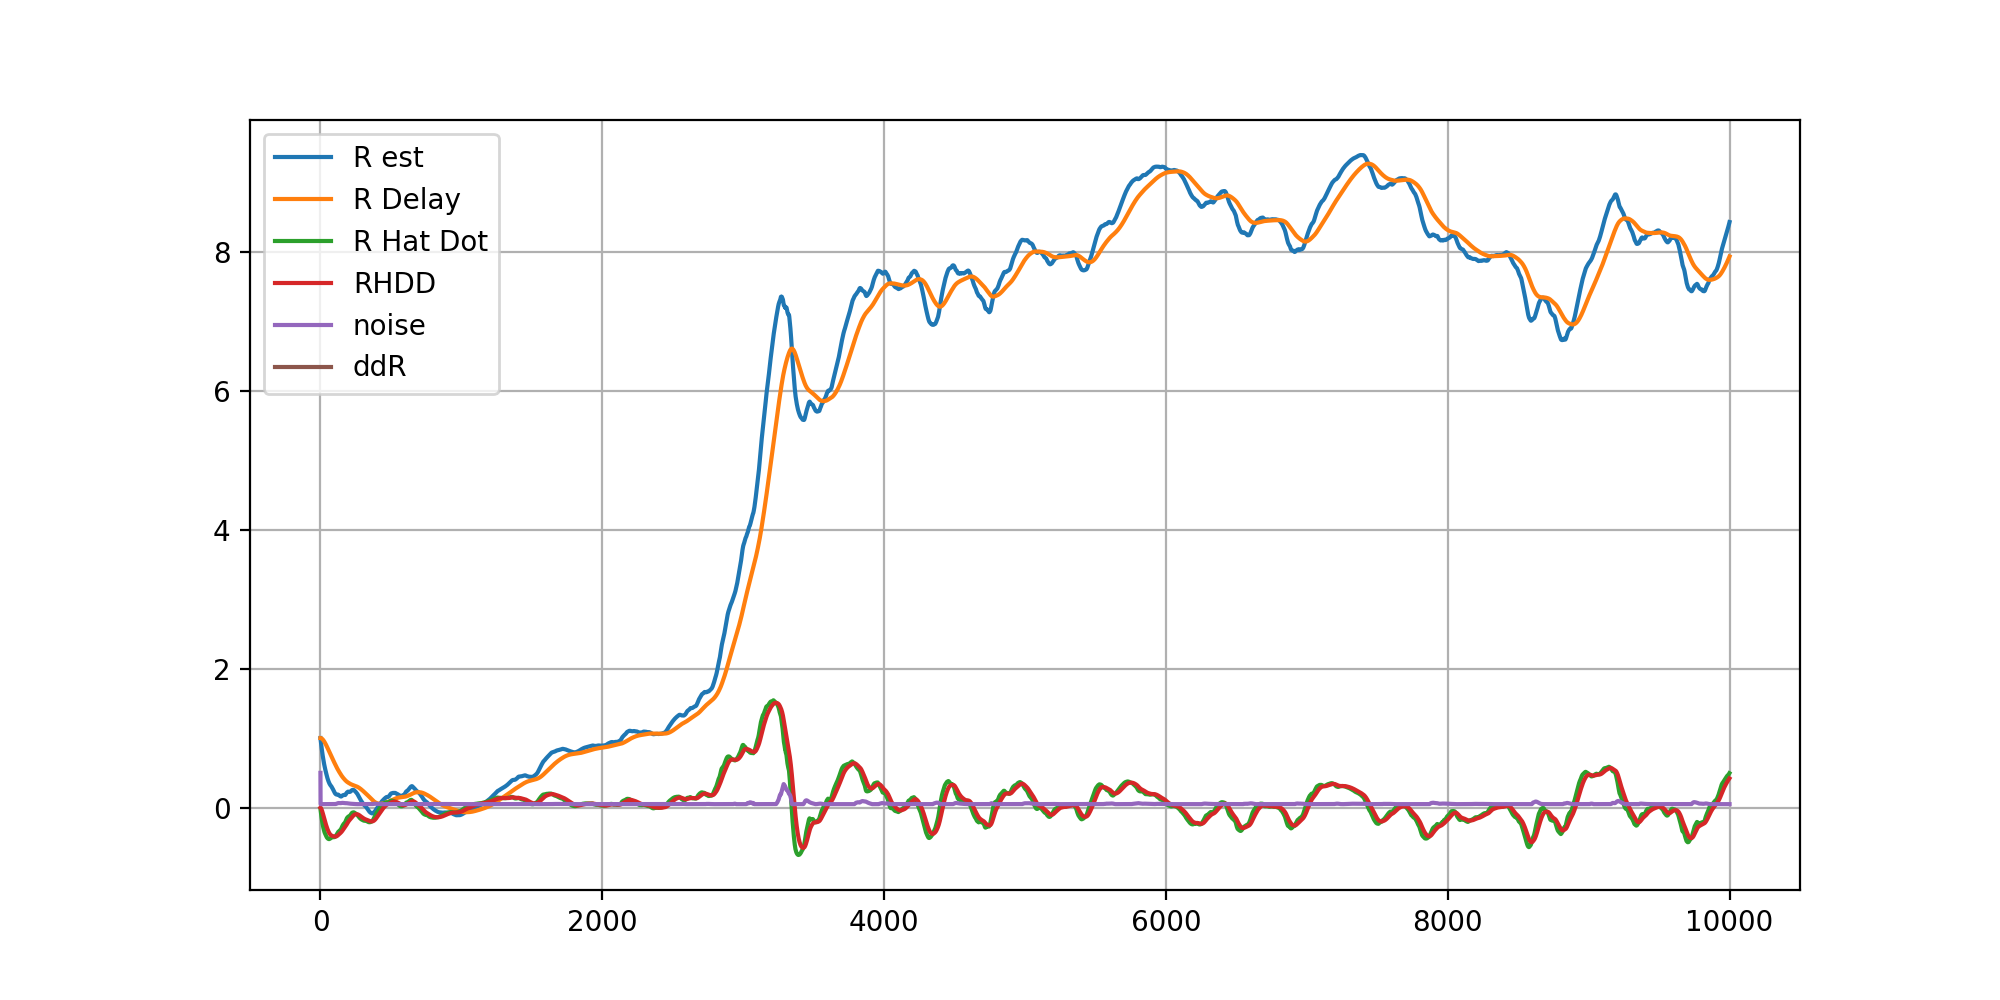

In [11]:
# Initial state
x = -.25
y = -1.5
z = 0 

# Noise parameters
c = 0.1
noise_scale = 1


dt = 0.1
scale = 100
reward_vals = [reward(x, dt, y, scale)]
R_est = R_delay = 1.0
R_est_vals = [R_est]
R_delay_vals = [R_delay]

dRdT_vals = [0, 0]
dR_vals = [0]

X_est = X_delay = x
Y_est = Y_delay = y 

X_est_vals = []
X_delay_vals = []

Y_est_vals = []
Y_delay_vals = []

R_hat_dot_delay = 0
dR_hat_dot_delay = 0
R_hat_dot_delay_vals=[]
X_hat_dot_vals = []
Y_hat_dot_vals = []
R_hat_dot_vals = []
ddR_vals = []
noise_vals = [0.5]
# Create a list to store the path
path = [(x, y)]
tau = 10
num_steps = 10000

# Hill climbing iterations
for i in range(num_steps):
    # Store the current state in the path
    path.append((x, y))

    R = reward(x, dt, y, scale)
    reward_vals.append(R)
    
    # Lowpass filtered inputs
    dX_est = (1/tau) * (x - X_est) # replace all est's with hat's
    dX_delay = (1/tau) * (X_est - X_delay)
    
    dY_est = (1/tau) * (y - Y_est)
    dY_delay = (1/tau) * (Y_est - Y_delay)
    
    X_est += (dX_est*dt)
    X_delay += (dX_delay*dt)
    
    Y_est += (dY_est*dt)
    Y_delay += (dY_delay*dt)
    
    X_est_vals.append(X_est)
    X_delay_vals.append(X_delay)
    
    Y_est_vals.append(Y_est)
    Y_delay_vals.append(Y_delay)
    
    X_hat_dot = X_est - X_delay
    X_hat_dot_vals.append(X_hat_dot)

    Y_hat_dot = Y_est - Y_delay
    Y_hat_dot_vals.append(Y_hat_dot)
    
    
    dR_est = (1/tau) * (R - R_est) # * scale
    dR_delay = (1/tau) * (R_est - R_delay) # * scale
    
    R_est += (dR_est*dt)
    R_delay += (dR_delay*dt)
    
    R_est_vals.append(R_est)
    R_delay_vals.append(R_delay)
    
    R_hat_dot = R_est - R_delay
    R_hat_dot_vals.append(R_hat_dot)

    dR_hat_dot_delay = (1/(.25*tau)) * (R_hat_dot - R_hat_dot_delay) # * scale
    R_hat_dot_delay += dR_hat_dot_delay*dt
    
    R_hat_dot_delay_vals.append(R_hat_dot_delay)

    R_hat_dot_dot = R_hat_dot - R_hat_dot_delay
    
#     ddR = (1/tau) * (R_hat_dot_delay - R_hat_dot_dot) # * scale
#     ddR_vals.append(ddR)
    
    # Scale gets added to all dR equations
    ceiling = 0.1
    dXdt = sigmoid(X_hat_dot * R_hat_dot, amp=10, ceiling=ceiling) - (.5 * ceiling)
    dYdt = sigmoid(Y_hat_dot * R_hat_dot, amp=10, ceiling=ceiling) - (.5 * ceiling)
    
    c = 0.05 + max(-R_hat_dot * R_hat_dot_dot, 0) * noise_scale # 0.05 + max(0,(1 - abs(R_hat_dot))) * R_hat_dot_dot * noise_scale # when R isnt changing, increase noise
    noise_vals.append(c)
    # Boost noise when R_hat_dot is negative and approaching zero and R_hat_dot_dot is positive
    
    x += (dXdt * dt) + c*np.random.normal(0,np.sqrt(dt))
    y += (dYdt * dt) + c*np.random.normal(0,np.sqrt(dt))
    
    # x, y = np.array([x, y]) + (dXdt * dt) + c*np.random.normal(0,np.sqrt(dt), size=2)

# 3D plot
# Path
# path_x = [point[0] for point in path]
# path_y = [point[1] for point in path]
# path_z = [reward(point[0], dt=dt, y=point[1]) for point in path]
# ax.plot(path_x, path_y, path_z, color='r', marker='o', markersize=2)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Reward')

# plt.show()

# Re-plot the reward function and the path with smaller markers

# Generate grid for the 2D space
x_values = np.linspace(-8, 8, 100)
y_values = np.linspace(-8, 8, 100)
x_grid, y_grid = np.meshgrid(x_values, y_values)

# # Calculate reward values for the grid
z_grid = np.vectorize(reward)(x_grid, dt=dt, y=y_grid, scale=scale)

# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Plot the reward function
# ax.plot_surface(x_grid, y_grid, z_grid, cmap='Greys', alpha=0.6)

# # Plot the path with smaller markers
# ax.plot(path_x, path_y, path_z, color='r', marker='o', markersize=2)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Reward')

# plt.show()

# Generate the 2D contour plot with color shading based on the reward value
plt.figure(figsize=(8, 6))
contour = plt.contourf(x_grid, y_grid, z_grid, cmap='viridis')
plt.colorbar(contour)

# Plot the path on the 2D space
path_x = [point[0] for point in path]
path_y = [point[1] for point in path]

# Generate a color gradient based on the length of the path
# Beginning is yellow, end is red
colors = plt.cm.YlOrRd(np.linspace(0, 1, len(path_x)))

for i in range(1, len(path_x)):
    plt.plot(path_x[i-1:i+1], path_y[i-1:i+1], color=colors[i], marker='o', markersize=1)

# plt.plot(path_x, path_y, color='r', marker='o', markersize=1)

# Set the aspect of the plot to match the one-to-one aspect of the data
plt.axis('equal')

plt.show()
# TODO
# Plot multiple trajectories
# Have a heatmap of presence in certain areas with counts of where it started and where it stopped
plt.figure(figsize=(10, 5))
plt.plot(R_est_vals, label='R est')
plt.plot(R_delay_vals, label="R Delay")
plt.plot(R_hat_dot_vals, label="R Hat Dot")
plt.plot(R_hat_dot_delay_vals, label='RHDD')
plt.plot(noise_vals, label='noise')
plt.plot(ddR_vals, label="ddR")

# plt.plot(X_hat_dot_vals, label="X Hat Dot")
# plt.plot(X_delay_vals, label="x_delay")
# plt.plot(path, label="x")
plt.grid()
plt.legend()

In [21]:
y_grid[-1]

array([8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.])

In [5]:
def print_progress(iteration: int, total: int) -> None:
    progress = iteration / total
    progress_bar_length = 50
    filled_length = int(progress * progress_bar_length)
    bar = "#" * filled_length + "-" * (progress_bar_length - filled_length)

    print(f"\rProgress: [{bar}] {progress:.1%} ~ {iteration}/{total}", end="")

In [6]:
def hill_climbing_simulation_2d():
     # Initial state
    x = np.random.randint(-2,2)
    y = np.random.randint(-2,2)
    z = 0 

    # Noise parameters
    c = 0.1
    noise_scale = 1


    dt = 0.1
    scale = 100
    reward_vals = [reward(x, dt, y, scale)]
    R_est = R_delay = 1.0
    R_est_vals = [R_est]
    R_delay_vals = [R_delay]

    dRdT_vals = [0, 0]
    dR_vals = [0]

    X_est = X_delay = x
    Y_est = Y_delay = y 

    X_est_vals = []
    X_delay_vals = []

    Y_est_vals = []
    Y_delay_vals = []

    R_hat_dot_delay = 0
    dR_hat_dot_delay = 0
    R_hat_dot_delay_vals=[]
    X_hat_dot_vals = []
    Y_hat_dot_vals = []
    R_hat_dot_vals = []
    ddR_vals = []

    # Create a list to store the path
    path = [(x, y)]
    tau = 10
    num_steps = 10000

    # Hill climbing iterations
    for i in range(num_steps):
        # Store the current state in the path
        path.append((x, y))

        R = reward(x, dt, y, scale)
        reward_vals.append(R)

        # Lowpass filtered inputs
        dX_est = (1/tau) * (x - X_est) # replace all est's with hat's
        dX_delay = (1/tau) * (X_est - X_delay)

        dY_est = (1/tau) * (y - Y_est)
        dY_delay = (1/tau) * (Y_est - Y_delay)

        X_est += (dX_est*dt)
        X_delay += (dX_delay*dt)

        Y_est += (dY_est*dt)
        Y_delay += (dY_delay*dt)

        X_est_vals.append(X_est)
        X_delay_vals.append(X_delay)

        Y_est_vals.append(Y_est)
        Y_delay_vals.append(Y_delay)

        X_hat_dot = X_est - X_delay
        X_hat_dot_vals.append(X_hat_dot)

        Y_hat_dot = Y_est - Y_delay
        Y_hat_dot_vals.append(Y_hat_dot)


        dR_est = (1/tau) * (R - R_est) # * scale
        dR_delay = (1/tau) * (R_est - R_delay) # * scale

        R_est += (dR_est*dt)
        R_delay += (dR_delay*dt)

        R_est_vals.append(R_est)
        R_delay_vals.append(R_delay)

        R_hat_dot = R_est - R_delay
        R_hat_dot_vals.append(R_hat_dot)

        dR_hat_dot_delay = (1/(.25*tau)) * (R_hat_dot - R_hat_dot_delay) # * scale
        R_hat_dot_delay += dR_hat_dot_delay*dt

        R_hat_dot_delay_vals.append(R_hat_dot_delay)

        R_hat_dot_dot = R_hat_dot - R_hat_dot_delay

    #     ddR = (1/tau) * (R_hat_dot_delay - R_hat_dot_dot) # * scale
    #     ddR_vals.append(ddR)

        # Scale gets added to all dR equations
        ceiling = 0.1
        dXdt = sigmoid(X_hat_dot * R_hat_dot, amp=10, ceiling=ceiling) - (.5 * ceiling)
        dYdt = sigmoid(Y_hat_dot * R_hat_dot, amp=10, ceiling=ceiling) - (.5 * ceiling)

        c = 0.05 + max(0,(1 - abs(R_hat_dot))) * R_hat_dot_dot * noise_scale # when R isnt changing, increase noise

        # Boost noise when R_hat_dot is negative and approaching zero and R_hat_dot_dot is positive

        x += (dXdt * dt) + c*np.random.normal(0,np.sqrt(dt))
        y += (dYdt * dt) + c*np.random.normal(0,np.sqrt(dt))

    return path

# Running the updated 2D hill climbing simulations
num_simulations = 10
paths_2d = [hill_climbing_simulation_2d() for _ in range(num_simulations)]
grid_size = 32
# Extracting x and y positions from the new 2D paths
x_positions = [pos[0] for path in paths_2d for pos in path]
y_positions = [pos[1] for path in paths_2d for pos in path]

# Define boundaries for x and y based on their values
x_min, x_max = -8, 8 # min(x_positions), max(x_positions)
y_min, y_max = -8, 8 # min(y_positions), max(y_positions)

# Define sections for x and y
x_sections = np.linspace(-8, 8, grid_size+1)
y_sections = np.linspace(-8, 8, grid_size+1)

# TODO
# More dimensions
# Add it to the simulation. Move the start and stop thresholds around and get a sense of the reward surface. Then plot


<IPython.core.display.Javascript object>


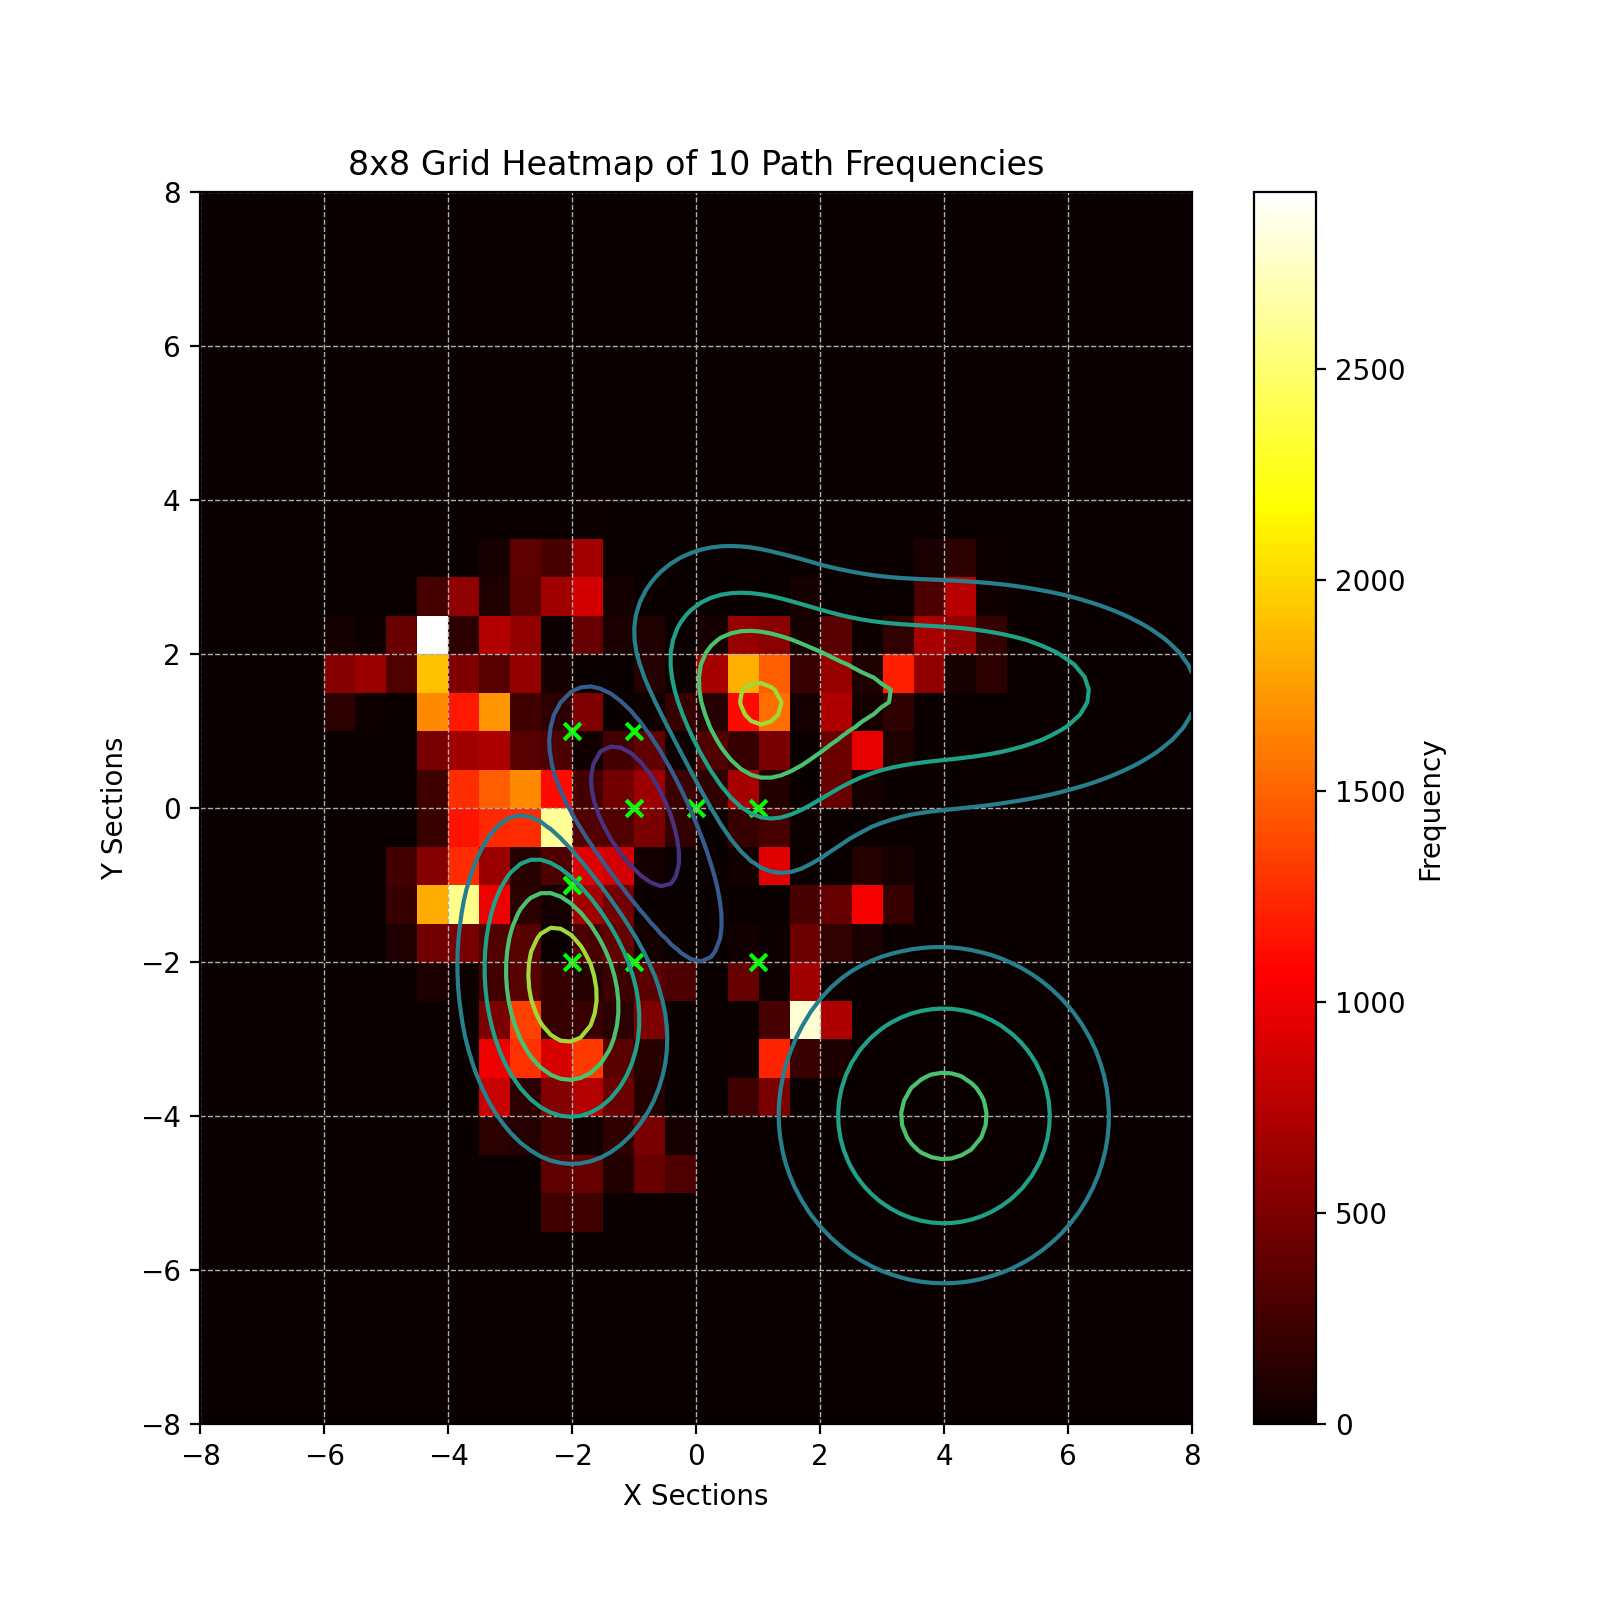

In [7]:
# Initialize a 9x9 matrix to store frequencies
grid_frequencies = np.zeros((grid_size, grid_size))
starting_pos = []
# Populate the grid with frequencies
for path in paths_2d:
    starting_pos.append((path[0][0], path[0][1]))
    for (x, y) in path:
        # Find x and y section
        x_index = np.digitize(x, x_sections) - 1
        y_index = np.digitize(y, y_sections) - 1

        x_index = max(0, min(grid_size-1, x_index))
        y_index = max(0, min(grid_size-1, y_index))
        
        # Increment the frequency for the grid cell
        grid_frequencies[y_index, x_index] += 1

# Plotting the 9x9 grid heatmap
plt.figure(figsize=(8, 8))
plt.imshow(grid_frequencies, cmap='hot', aspect='auto', origin='lower', extent=[x_min, x_max, y_min, y_max])
plt.colorbar(label='Frequency')
for pos in starting_pos:
    plt.scatter(pos[0], pos[1], marker='x', color='lime')
plt.contour(x_grid, y_grid, z_grid, cmap='viridis')
plt.title(f"8x8 Grid Heatmap of {num_simulations} Path Frequencies")
plt.xlabel("X Sections")
plt.ylabel("Y Sections")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


# plt.figure(figsize=(8,8))
# for pos in starting_pos:
#     plt.scatter(pos[0], pos[1], marker='x', color='lime')
# for path in paths_2d:
#     # Plot the path on the 2D space
#     path_x = [point[0] for point in path]
#     path_y = [point[1] for point in path]

#     # Generate a color gradient based on the length of the path
#     # Beginning is yellow, end is red
#     colors = plt.cm.YlOrRd(np.linspace(0, 1, len(path_x)))

#     for i in range(1, len(path_x)):
#         plt.plot(path_x[i-1:i+1], path_y[i-1:i+1], color=colors[i], marker='o', markersize=1)

#     # plt.plot(path_x, path_y, color='r', marker='o', markersize=1)

#     # Set the aspect of the plot to match the one-to-one aspect of the data
#     plt.axis('equal')
    
# plt.contour(x_grid, y_grid, z_grid, cmap='viridis')
# plt.show()
